In [2]:
from netCDF4 import Dataset
import numpy as np
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')

In [5]:
import cmocean

In [6]:
topo = -nc.variables['z'][::10,::10]
x = nc.variables['x'][::10]
y = nc.variables['y'][::10]
lon_0 = x.mean()
lat_0 = y.mean()
lon, lat = np.meshgrid(x, y)


In [7]:
import seaborn as sns
sns.set_style('ticks')

In [41]:
import pandas as pd

In [42]:
gauges = pd.read_pickle('/Users/imarkelo/git/Great-Lakes-Data/measurements/LE pickles/master_df')

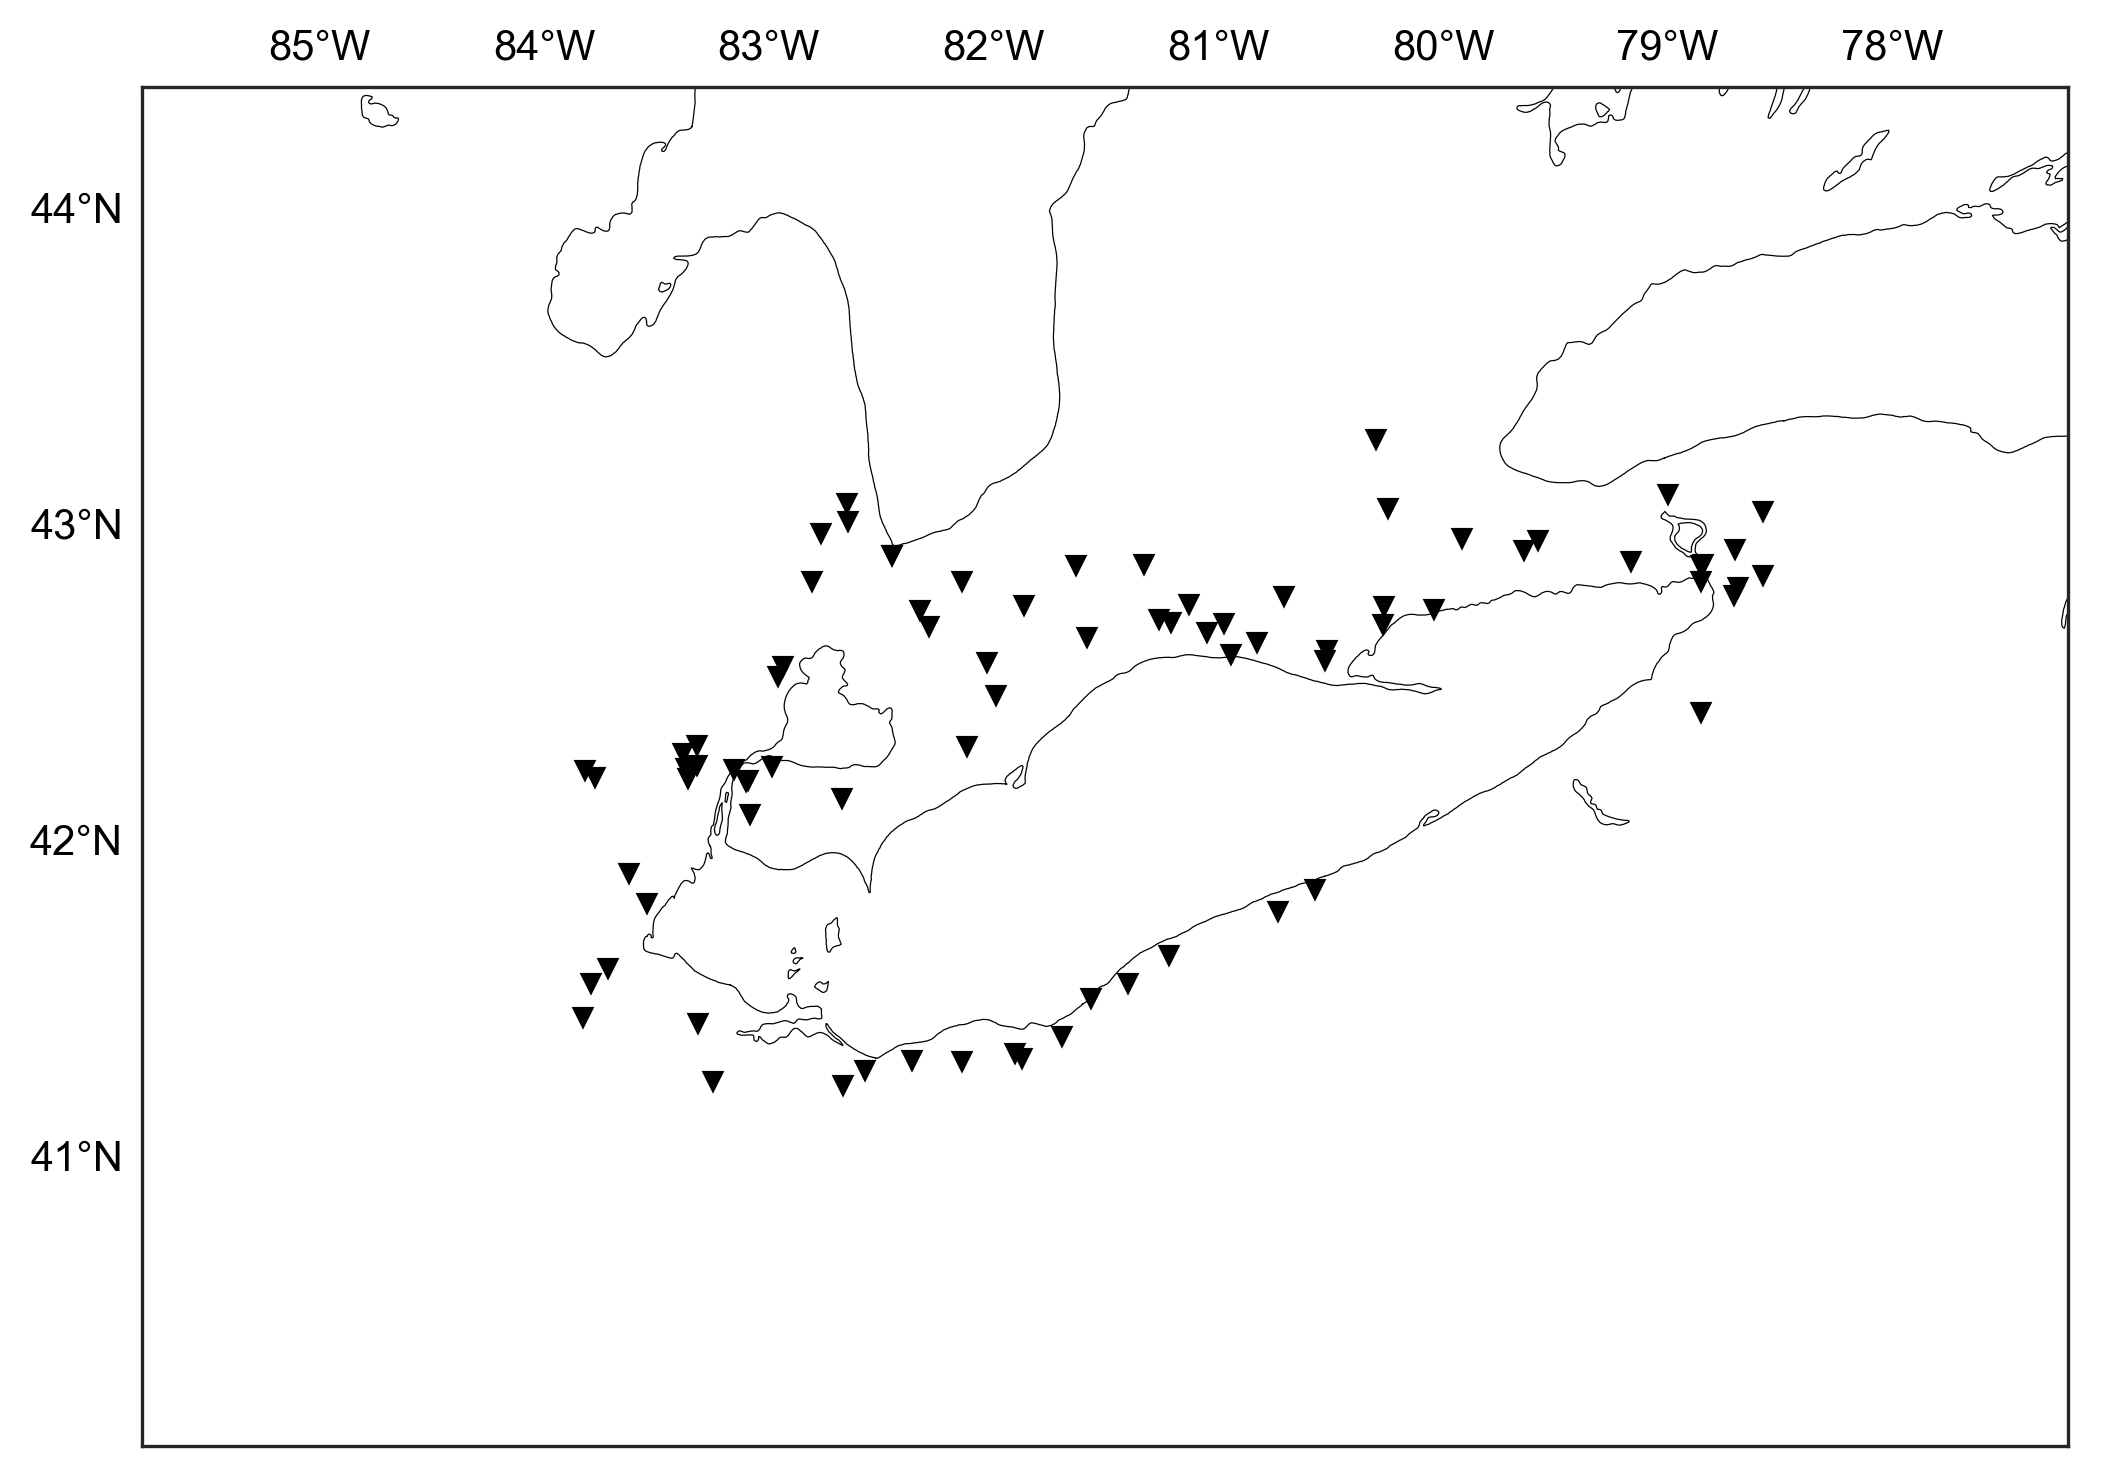

In [43]:
m = Basemap(width=500000*0.8*1.7,height=300000*0.8*2, resolution='f',projection='stere',lat_0=lat_0+0.32,lon_0=lon_0-0.5)
x, y = m(lon, lat)



levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=300)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines(linewidth=0.3)
m.drawparallels(np.arange(38., 47, 1.),labels=[1,0,0,0], fontsize=10, linewidth=0.)
m.drawmeridians(np.arange(-88., -68., 1.),labels=[0,0,1,0], fontsize=10, linewidth=0.)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
# cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
# plt.contour(x,y,topo, levels=levels1, colors='k', linewidths=0.1)  # negative contours will be dashed by default
# cbar = m.colorbar(cax,location='bottom')

# # cbar = m.colorbar(cs, location='bottom')
# cbar.set_label('Depth, m')
# plt.show()
# plt.savefig('Bathymetry.png')
x1, y1 = m(gauges.LONGITUDE.values, gauges.LATITUDE.values)
m.plot(x1, y1, 'v', markerfacecolor='k',
             markeredgewidth=1,  markeredgecolor='k', markersize=4)

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
import gdal

In [ ]:


raster = gdal.Open('ice/grid2011/g20110202.ct')
band = raster.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

In [64]:
c={}
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/central.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
for d in np.linspace(0,64.5,65/0.5):
    neg = x[x<-d]
    c[d] = -neg.sum(axis=0)/0.5
c

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{0.0: 91595744.0,
 0.5: 91590576.0,
 1.0: 91569136.0,
 1.5: 91551384.0,
 2.0: 91529728.0,
 2.5: 91504920.0,
 3.0: 91475160.0,
 3.5: 91438176.0,
 4.0: 91395456.0,
 4.5: 91344384.0,
 5.0: 91280944.0,
 5.5: 91208088.0,
 6.0: 91106296.0,
 6.5: 90999264.0,
 7.0: 90847008.0,
 7.5: 90654912.0,
 8.0: 90435120.0,
 8.5: 90200832.0,
 9.0: 89880576.0,
 9.5: 89521496.0,
 10.0: 88979400.0,
 10.5: 88483912.0,
 11.0: 87634432.0,
 11.5: 86570672.0,
 12.0: 85193464.0,
 12.5: 83913632.0,
 13.0: 82309744.0,
 13.5: 80934392.0,
 14.0: 79251048.0,
 14.5: 77833640.0,
 15.0: 76432248.0,
 15.5: 74903264.0,
 16.0: 73270792.0,
 16.5: 71451760.0,
 17.0: 69314880.0,
 17.5: 66707092.0,
 18.0: 64211384.0,
 18.5: 61514864.0,
 19.0: 58156340.0,
 19.5: 52280204.0,
 20.0: 46895704.0,
 20.5: 39887812.0,
 21.0: 33338192.0,
 21.5: 20598596.0,
 22.0: 12724782.0,
 22.5: 10737733.0,
 23.0: 5283979.0,
 23.5: 4031520.0,
 24.0: 52864.1328125,
 24.5: 34660.23046875,
 25.0: 19105.09765625,
 25.5: 6217.869140625,
 26.0: -0.0,
 26.5:

In [78]:
depths[::-1]

array([63. , 62.5, 62. , 61.5, 61. , 60.5, 60. , 59.5, 59. , 58.5, 58. ,
       57.5, 57. , 56.5, 56. , 55.5, 55. , 54.5, 54. , 53.5, 53. , 52.5,
       52. , 51.5, 51. , 50.5, 50. , 49.5, 49. , 48.5, 48. , 47.5, 47. ,
       46.5, 46. , 45.5, 45. , 44.5, 44. , 43.5, 43. , 42.5, 42. , 41.5,
       41. , 40.5, 40. , 39.5, 39. , 38.5, 38. , 37.5, 37. , 36.5, 36. ,
       35.5, 35. , 34.5, 34. , 33.5, 33. , 32.5, 32. , 31.5, 31. , 30.5,
       30. , 29.5, 29. , 28.5, 28. , 27.5, 27. , 26.5, 26. , 25.5, 25. ,
       24.5, 24. , 23.5, 23. , 22.5, 22. , 21.5, 21. , 20.5, 20. , 19.5,
       19. , 18.5, 18. , 17.5, 17. , 16.5, 16. , 15.5, 15. , 14.5, 14. ,
       13.5, 13. , 12.5, 12. , 11.5, 11. , 10.5, 10. ,  9.5,  9. ,  8.5,
        8. ,  7.5,  7. ,  6.5,  6. ,  5.5,  5. ,  4.5,  4. ,  3.5,  3. ,
        2.5,  2. ,  1.5,  1. ,  0.5,  0. ])

In [36]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63,63.5/0.5)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [39]:
e_vol[0]/0.5*1e-9

907.1526911433333

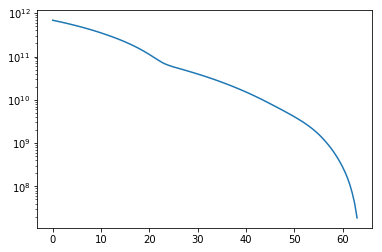

In [193]:
plt.semilogy(depths, e_vol) 

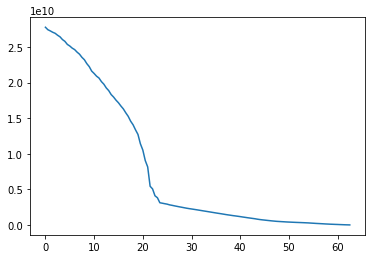

In [173]:
plt.plot(depths[:-1], -np.diff(e_vol)/0.5)

### This is the volume of layers of lake Erie (eastern basin) with 0.5 step in depth np.linspace(0,63,63.5/0.5)

In [40]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/eastern.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

In [41]:
e_vol[0]/0.5*1e-9

336.04088757489484

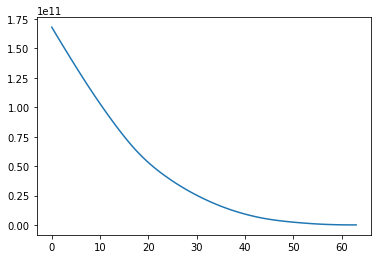

In [185]:
plt.plot(depths, e_vol)

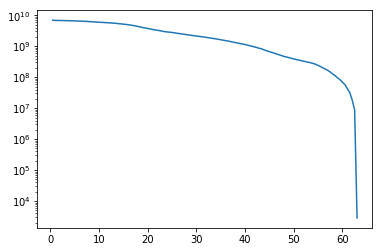

In [187]:
plt.semilogy(depths[1:], -np.diff(e_vol)/0.5 )

In [191]:
-np.diff(e_vol)/0.5

array([6.91074607e+09, 6.83717960e+09, 6.80890203e+09, 6.77719234e+09,
       6.75199869e+09, 6.71882166e+09, 6.68974823e+09, 6.65174635e+09,
       6.61777347e+09, 6.57089288e+09, 6.53110034e+09, 6.48101147e+09,
       6.43920443e+09, 6.38349487e+09, 6.33370445e+09, 6.25342300e+09,
       6.18331351e+09, 6.09818234e+09, 6.03652877e+09, 5.96472810e+09,
       5.90726518e+09, 5.84094842e+09, 5.78464197e+09, 5.70919780e+09,
       5.64422404e+09, 5.56358196e+09, 5.49249009e+09, 5.36787726e+09,
       5.27887875e+09, 5.16309489e+09, 5.07530259e+09, 4.94908562e+09,
       4.83945716e+09, 4.66775234e+09, 4.53661104e+09, 4.33121934e+09,
       4.19777753e+09, 4.00552981e+09, 3.89075319e+09, 3.72873537e+09,
       3.61991520e+09, 3.48182886e+09, 3.37829363e+09, 3.26724757e+09,
       3.18541172e+09, 3.04861242e+09, 2.96913925e+09, 2.89808469e+09,
       2.84560205e+09, 2.78106974e+09, 2.72200890e+09, 2.62788088e+09,
       2.56855891e+09, 2.49955615e+09, 2.43606839e+09, 2.37182209e+09,
      

In [82]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<-d]
    e_vol = np.append(e_vol,  -neg.sum(axis=0)*0.75*(111.32*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

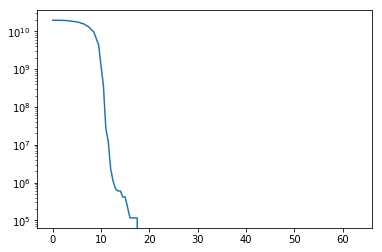

In [85]:
plt.semilogy(depths, e_vol)

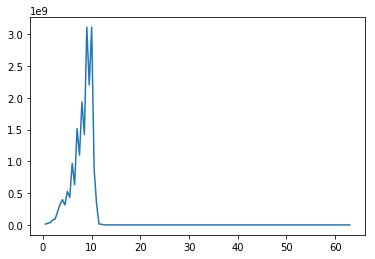

In [84]:
plt.plot(depths[1:], -np.diff(e_vol) )

In [7]:
dataset = ds

In [8]:
c+e+w

-75918530.0

In [139]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

-72950530.0

In [138]:
(x<=0).sum()

4003077

In [22]:
dataset=ds

In [23]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

Band Type=Float32
Min=-62.477, Max=355.665


In [24]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 7201 x 2401 x 1
Projection is 
Origin = (-84.00041666665, 43.000416666549995)
Pixel Size = (0.0008333333, -0.0008333333)


In [97]:
e*1e-9*0.75*(111.32*0.0008333333*1000)**2

-174.72982637721475

In [33]:
scanline = band.ReadRaster(xoff=0, yoff=0,
                           xsize=band.XSize, ysize=1,
                           buf_xsize=band.XSize, buf_ysize=1,
                           buf_type=gdal.GDT_Float32)

In [34]:
import struct
tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [44]:
print('{:.8f}'.format((np.array(tuple_of_floats) - tuple_of_floats[0])[4]))

0.00001526


### Lake Ontario

In [6]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

-3614.179194753807

In [2]:
dataset=ds

In [3]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

Band Type=Float32
Min=-239.402, Max=321.879


In [4]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

Driver: GTiff/GeoTIFF
Size is 4621 x 1321 x 1
Projection is GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.2572221010042,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4269"]]
Origin = (-79.90041666666666, 44.25041666662265)
Pixel Size = (0.0008333333333, -0.0008333333333)


In [66]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.grd")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
depths = np.linspace(0,250,501)
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal


In [67]:
-np.diff(e_vol)/0.5

array([ 1.88163019e+10,  1.87412929e+10,  1.86825989e+10,  1.86079879e+10,
        1.85437229e+10,  1.84625462e+10,  1.83972864e+10,  1.83127272e+10,
        1.82389121e+10,  1.81501747e+10,  1.80823284e+10,  1.80089112e+10,
        1.79432535e+10,  1.78660559e+10,  1.77990055e+10,  1.77200173e+10,
        1.76573441e+10,  1.75811413e+10,  1.75162795e+10,  1.74351027e+10,
        1.73690471e+10,  1.72956298e+10,  1.72349462e+10,  1.71609321e+10,
        1.70972640e+10,  1.70280250e+10,  1.69611735e+10,  1.68865625e+10,
        1.68215017e+10,  1.67468907e+10,  1.66810340e+10,  1.66028417e+10,
        1.65431529e+10,  1.64705315e+10,  1.64078582e+10,  1.63316555e+10,
        1.62671916e+10,  1.61971567e+10,  1.61314990e+10,  1.60511181e+10,
        1.59862562e+10,  1.59170172e+10,  1.58493699e+10,  1.57715754e+10,
        1.57023364e+10,  1.56291181e+10,  1.55658480e+10,  1.54876556e+10,
        1.54166260e+10,  1.53503714e+10,  1.52890909e+10,  1.52158726e+10,
        1.51549900e+10,  